# DF902_SunHwanPark

# 01

In [1]:
#1. Dense 레이어
#- 인공신경망 모형에 입력과 출력이 모두 연결된 은닉층(들)과, 출력층을 생성한다.(add 함수로 모델에 추가)
#	* 주요 파라미터
#	- units: 해당 층에 배치할 노드 수
#	- input_dim: 입력 특성의 수, 즉 입력 노드의 개수이다.(최초 은닉층 외에는 기재 X)
#	- kernel_initializer: 가중치들의 초기화, 설정 방법.
#	- activation: 활성화 함수.

#2. Flatten 레이어
#- 인공신경망 모형에 다차원 데이터를 1차원으로 변환해주는 층을 추가한다.('완전 연결'된 결합 은닉층으로 출력하는 역할)

#3. Conv2D
#- 인공신경망 모형에 합성곱층을 생성한다.(데이터의 특성 정보를 추출·축소하는 역할)
#	* 주요 파라미터
#	- filters: 필터(커널)의 개수.
#	- kernel_size: 필터(커널)의 크기.
#	- strides: 스트라이드(필터가 이동하는 간격) 값.
#	- padding: 패딩 적용 방법.("Same" -> 제로 패딩)
#	- activation: 활성화 함수.
#	- input_shape: 입력 특성 형태.(최초 은닉층 외에는 기재 X)

#4. MaxPooling2D
#- 인공신경망 모형에 풀링층(출력의 크기를 줄이는 역할)을 생성한다.(최대 풀링 방식)
#- pool_size: 적용할 풀링 크기.

# 02

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
np.random.seed(3)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator_rgb = train_datagen.flow_from_directory(
    'C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF902\\DF902_Data\\DF902_Data_Galaxy_Resize\\train_galaxy',
    target_size=(50, 50),
    batch_size=27,
    class_mode='categorical')

Found 10233 images belonging to 3 classes.


In [6]:
train_generator_gray = train_datagen.flow_from_directory(
    'C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF902\\DF902_Data\\DF902_Data_Galaxy_Resize\\train_galaxy',
    target_size=(50, 50),
    batch_size=27,
    color_mode='grayscale',
    class_mode='categorical')

Found 10233 images belonging to 3 classes.


In [7]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
val_generator_rgb = val_datagen.flow_from_directory(
    'C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF902\\DF902_Data\\DF902_Data_Galaxy_Resize\\val_galaxy',
    target_size=(50, 50),
    batch_size=3,
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [9]:
val_generator_gray = val_datagen.flow_from_directory(
    'C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF902\\DF902_Data\\DF902_Data_Galaxy_Resize\\val_galaxy',
    target_size=(50, 50),
    batch_size=3,
    color_mode='grayscale',
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [39]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
test_generator_rgb = test_datagen.flow_from_directory(
    'C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF902\\DF902_Data\\DF902_Data_Galaxy_Resize\\test_galaxy',
    target_size=(50, 50),
    batch_size=1,
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [41]:
test_generator_gray = test_datagen.flow_from_directory(
    'C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF902\\DF902_Data\\DF902_Data_Galaxy_Resize\\test_galaxy',
    target_size=(50, 50),
    batch_size=1,
    color_mode='grayscale',
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [13]:
# A = flow_from_directory
# B = target_size
# C = batch_size
# D = class_mode

# 03

In [67]:
model_rgb = Sequential()

model_rgb.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',\
                 input_shape=(50, 50, 3)))
model_rgb.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_rgb.add(MaxPooling2D(pool_size=(2, 2)))

model_rgb.add(Flatten())

model_rgb.add(Dense(units=128, activation='relu'))
model_rgb.add(Dropout(0.2))
model_rgb.add(Dense(units=3, activation='softmax'))

ValueError: The `kernel_size` argument must be a tuple of 2 integers. Received: (3, 3, 3)

In [54]:
model_gray = Sequential()

model_gray.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',\
                 input_shape=(50, 50, 1)))
model_gray.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_gray.add(MaxPooling2D(pool_size=(2, 2)))

model_gray.add(Flatten())

model_gray.add(Dense(units=128, activation='relu'))
model_gray.add(Dropout(0.2))
model_gray.add(Dense(units=3, activation='softmax'))

# 04

In [16]:
# 1. Relu 활성함수
# - Rectified Linear Unit
# - 입력값 < 0이면 0, 입력값 > 0이면 입력값을 그대로(linear) 출력.
# - 기존 활성함수로 많이 사용되던 sigmoid가 가진 문제 Gradient Vanishing을 해결하며 등장한 활성함수.
#     *Gradient Vanishing: 뉴럴 네트워크에서, 신경망이 깊어질수록 학습이 어려워지는 문제가 있어, 이를 해결하기 위해 전체 레이어를 한 번 계산한 후, 그 값을 역으로 다시 계산하는 Back Propagation을 사용한다.
#                          그런데 sigmoid 함수를 사용할 경우, 레이어가 깊어질수록 Back Propagation이 제대로 작동하지 않는 현상(값을 뒤에서 앞으로 전달할 때 희석이 되는 현상)이 발생했고, 이 현상을 Gradient Vanishing 이라고 한다.
# - 2가지 이상의 레이블 분류하는 경우 주로 사용!(sigmoid는 Gradient Vanishing 때문에 잘 사용 X)
# 뉴럴 네트워크의 은닉층 활성화 함수로 주로 사용.

# 2. softmax 활성함수
# - sigmoid(or Relu) 함수가 이산 분류(결과값에 따라 참 또는 거짓을 나타내는) 함수라면, softmax 함수는 여러 레이블 분류에 대한 확률 값을 출력할 수 있는 함수이다. 분류의 수 n에 대해, P(1) + P(2) + ... + P(n) = 1을 가지는 Pn값을 출력한다.
# - 3가지 이상의 레이블 분류하는 경우 주로 사용!
# - 뉴럴 네트워크 가장 마지막 부분에 주로 사용!(결과를 확률값을로 해석하기 위해)

# 05

In [55]:
model_rgb.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_gray.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 1. loss
# - 현재 모델의 가중치 세트를 평가하는 데 사용하는 손실 함수(cost function).
# - 현재 3가지 이상의 레이블을 분류하는 다중 클래스 문제이므로 'categorical_crossentrpy' 사용.

# 2. optimizer
# - 모델의 최적의 가중치(weight parameter)를 탐색하는 데 사용되는 최적화 알고리즘.
# - 최적을 값을 찾아가는 데 '방향성', '스탭사이즈' 모두를 고려하는 효율적인 Gradient Descent Optimizer 'adam' 사용.

# 06

In [56]:
hist_rgb = model_rgb.fit_generator(train_generator_rgb, steps_per_epoch=379, epochs=15, validation_data=val_generator_rgb, validation_steps=200)

Epoch 1/15
379/379 [==============================] - 93s 245ms/step - loss: 0.6453 - acc: 0.7360 - val_loss: 0.4820 - val_acc: 0.8100
Epoch 2/15
379/379 [==============================] - 94s 247ms/step - loss: 0.5149 - acc: 0.7960 - val_loss: 0.4789 - val_acc: 0.8267
Epoch 3/15
379/379 [==============================] - 102s 268ms/step - loss: 0.4430 - acc: 0.8234 - val_loss: 0.3930 - val_acc: 0.8433
Epoch 4/15
379/379 [==============================] - 94s 247ms/step - loss: 0.3809 - acc: 0.8478 - val_loss: 0.4295 - val_acc: 0.8383
Epoch 5/15
379/379 [==============================] - 90s 237ms/step - loss: 0.3146 - acc: 0.8769 - val_loss: 0.4211 - val_acc: 0.8450
Epoch 6/15
379/379 [==============================] - 108s 285ms/step - loss: 0.2563 - acc: 0.8999 - val_loss: 0.4987 - val_acc: 0.8250
Epoch 7/15
379/379 [==============================] - 99s 262ms/step - loss: 0.1943 - acc: 0.9258 - val_loss: 0.5480 - val_acc: 0.8317
Epoch 8/15
379/379 [==============================] -

In [60]:
hist_gray = model_gray.fit_generator(train_generator_gray, steps_per_epoch=379, epochs=15, validation_data=val_generator_gray, validation_steps=200)

Epoch 1/15
379/379 [==============================] - 95s 251ms/step - loss: 0.7171 - acc: 0.6874 - val_loss: 0.5647 - val_acc: 0.7867
Epoch 2/15
379/379 [==============================] - 89s 234ms/step - loss: 0.5720 - acc: 0.7710 - val_loss: 0.4818 - val_acc: 0.8100
Epoch 3/15
379/379 [==============================] - 89s 234ms/step - loss: 0.5304 - acc: 0.7876 - val_loss: 0.4515 - val_acc: 0.8233
Epoch 4/15
379/379 [==============================] - 89s 235ms/step - loss: 0.4671 - acc: 0.8115 - val_loss: 0.5056 - val_acc: 0.7933
Epoch 5/15
379/379 [==============================] - 91s 241ms/step - loss: 0.4255 - acc: 0.8265 - val_loss: 0.4777 - val_acc: 0.8333
Epoch 6/15
379/379 [==============================] - 93s 244ms/step - loss: 0.3751 - acc: 0.8537 - val_loss: 0.5328 - val_acc: 0.8150
Epoch 7/15
379/379 [==============================] - 102s 268ms/step - loss: 0.3242 - acc: 0.8724 - val_loss: 0.5619 - val_acc: 0.8117
Epoch 8/15
379/379 [==============================] - 

In [65]:
print("--Evaluate--")
print("rgb")
scores_rgb = model_rgb.evaluate_generator(test_generator_rgb, steps=600)
print("%s: %.2f%%" %(model_rgb.metrics_names[1], scores_rgb[1]*100))
print("------------")
print("gray")
scores_gray = model_gray.evaluate_generator(test_generator_gray, steps=600)
print("%s: %.2f%%" %(model_gray.metrics_names[1], scores_gray[1]*100))

--Evaluate--
rgb
acc: 80.50%
------------
gray
acc: 78.67%


In [43]:
# A: fit_generator
# B: 9(# of traning data / batch size => 10,233 / 1137)
    # * 트레이닝 데이터 셋 크기에 비해 기존 배치 사이즈(3)가 너무 작아, steps 수가 지나치게 커짐 => 시간 너무 오래 걸림, overfitting 문제 확인 => 배치 사이즈 수정(3 -> 1137)
# C: 200(# of validation data / batch size => 600 / 3)
# D: evaluate_generator
# E: 200(# of test data / batch size => 600 / 3)

# 07

In [45]:
# 은하를 Edge / Smooth / Spiral 세 종류로 분류하는 것은, 오로지 각 은하의 '형태'를 기준으로 한다.
# 따라서, 은하 분류 모델을 학습시킬 때 은하 사진의 RGB data를 사용할 필요가 없다.(Grayscale data 사용!)
# input data의 불필요한 feature를 줄이면서, over fitting 문제를 어느 정도 예방할 수 있기 때문에, 
# 같은 조건일 때 Grayscale 활용한 모델이 더 정확도가 높을 것이다.

# 개념적으로는 이렇게 생각해봤는데...
# RGB data 사용한 모델과 Grayscale data 사용한 모델의 정확도가 크게 차이가 나질 않아서 맞는 건지는 잘 모르겠습니다 ㅠ_ㅠ

# 다만 over fitting 문제를 해결하기 위해 epochs을 적정 수준으로 낮추고, Dropout layer을 추가했습니다.

In [66]:
# +++
# 같은 조건일 때, RGB data 사용 모델과 Grayscale data 사용 모델 간 정확도(val_acc)가 유의미한 차이를 보이는 것 같지 않습니다...
# 아래 그래프만 보면 RGB 모델의 정확도가 좀 더 높아보이지만, 이것도 돌릴 때마다 값이 달라져서 유의미한 것 같진 않습니다.

# 모델 세팅 설정을 잘못하고 있는 건지는 모르겠지만...
# 결과가 이렇게 나오니 RGB냐 Grayscale이냐가 크리티컬한 변수인가...싶은 생각이 드네요. 어렵네요 ㅠ_ㅠ

W1020 18:33:59.077327 17316 legend.py:1289] No handles with labels found to put in legend.


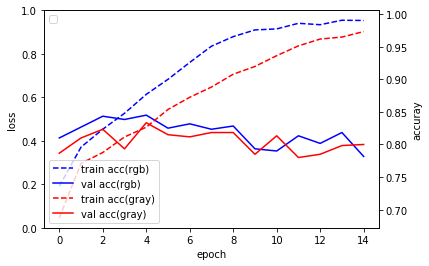

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

#loss_ax.plot(hist_rgb.history['loss'], 'g', linestyle = '--', label='train loss(rgb)')
#loss_ax.plot(hist_rgb.history['val_loss'], 'g', label='val loss(rgb)')
#loss_ax.plot(hist_gray.history['loss'], 'y', linestyle = '--', label='train loss(gray)')
#loss_ax.plot(hist_gray.history['val_loss'], 'y', label='val loss(gray)')

acc_ax.plot(hist_rgb.history['acc'], 'b', linestyle = '--', label='train acc(rgb)')
acc_ax.plot(hist_rgb.history['val_acc'], 'b', label='val acc(rgb)')
acc_ax.plot(hist_gray.history['acc'], 'r', linestyle = '--', label='train acc(gray)')
acc_ax.plot(hist_gray.history['val_acc'], 'r', label='val acc(gray)')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

W1020 18:34:45.284825 17316 legend.py:1289] No handles with labels found to put in legend.


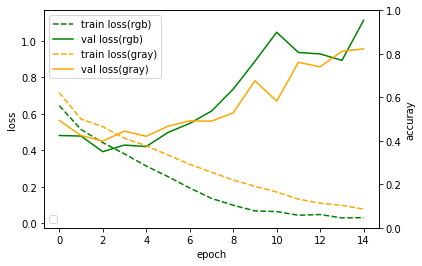

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_rgb.history['loss'], 'g', linestyle = '--', label='train loss(rgb)')
loss_ax.plot(hist_rgb.history['val_loss'], 'g', label='val loss(rgb)')
loss_ax.plot(hist_gray.history['loss'], 'orange', linestyle = '--', label='train loss(gray)')
loss_ax.plot(hist_gray.history['val_loss'], 'orange', label='val loss(gray)')

#acc_ax.plot(hist_rgb.history['acc'], 'b', linestyle = '--', label='train acc(rgb)')
#acc_ax.plot(hist_rgb.history['val_acc'], 'b', label='val acc(rgb)')
#acc_ax.plot(hist_gray.history['acc'], 'r', linestyle = '--', label='train acc(gray)')
#acc_ax.plot(hist_gray.history['val_acc'], 'r', label='val acc(gray)')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()